# IRIS FLOWER CLASSIFICATION

## Description

This project aims to classify Iris flowers into different species based on their measurements. The Iris flower dataset is a popular dataset in the field of machine learning and is often used for practicing classification algorithms.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Importing Dataset

In [2]:
df = pd.read_csv('Iris.csv')
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


I will view the first 5 rows of the dataset using the `head()` method.

In [3]:
df.head(5)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Now, I will view the information of the data frame like the number of rows, columns, data types, etc.

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Data Preprocessing

The id field is not required for the classification, so I will drop it from the data frame.

In [5]:
df2 = df.drop(columns="Id")


It is important to check for the null values as they might cause problems in the training of the model. I will check for the null values in the data frame.

In [6]:
df2.isnull().sum()


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null values in the data frame.

## Statistical Summary

I will use describe method to view the statistical summary of the data frame.

It will only show the summary of the numerical columns.

In [7]:
df2.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Visualization

Now, I will visualize the data to get a better understanding of the data like how many flowers of each species are present in the dataset?

In [8]:
df2['Species'].value_counts()


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Let's visualize the data using a count plot.

<Axes: xlabel='Species', ylabel='count'>

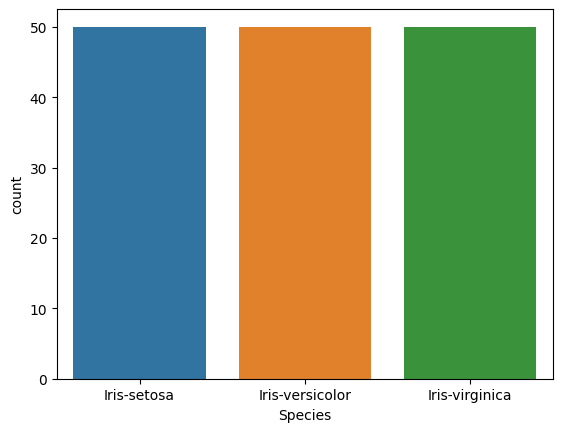

In [9]:
species = df2['Species']

sns.countplot(x=species, data=df2)


<Axes: xlabel='count', ylabel='Species'>

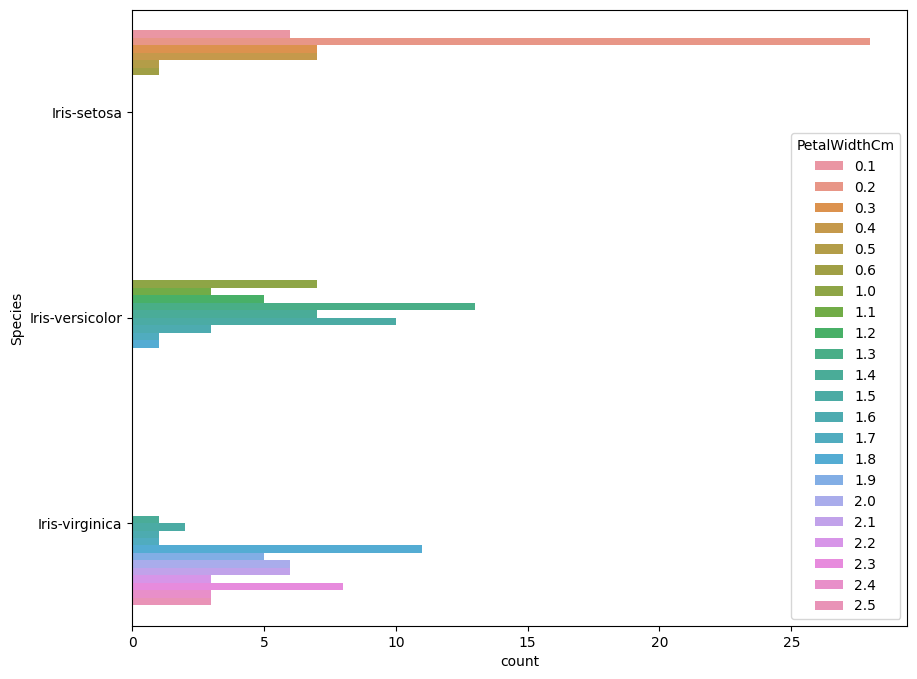

In [10]:
plt.figure(figsize=(10, 8))

sns.countplot(
    y=species,
    hue='PetalWidthCm',
    data=df2
)


Box plot by petal length and species.

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

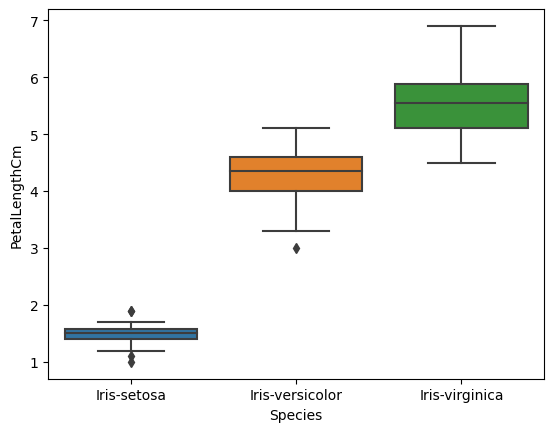

In [11]:
sns.boxplot(x='Species', y='PetalLengthCm', data=df2)


<Axes: xlabel='Species', ylabel='PetalWidthCm'>

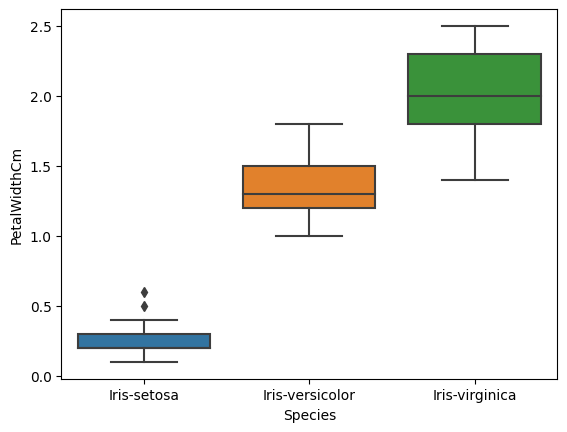

In [12]:
sns.boxplot(x='Species', y='PetalWidthCm', data=df2)


<Axes: xlabel='Species', ylabel='SepalLengthCm'>

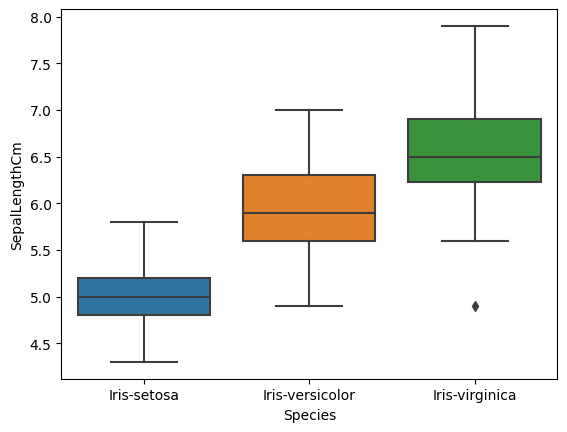

In [13]:
sns.boxplot(x='Species', y='SepalLengthCm', data=df2)


<Axes: xlabel='Species', ylabel='SepalWidthCm'>

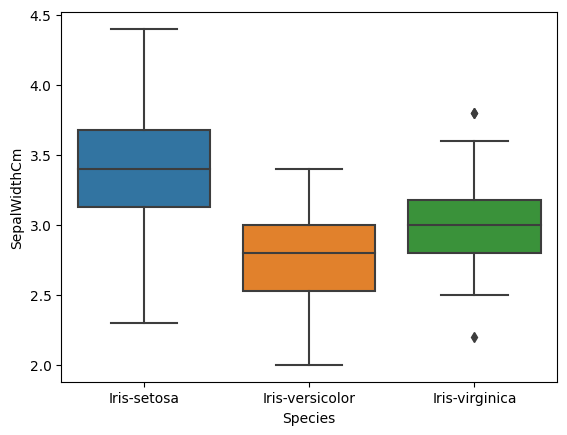

In [14]:
sns.boxplot(x='Species', y='SepalWidthCm', data=df2)


## Splitting the Dataset

First, the data must be split into dependent and independent variables. The independent variables are the measurements of the flowers, and the dependent variable is the species of the flower.

The dependent variable is the species column, so I will drop it from the training set and save it in a separate variable.

In [15]:
x = df2.drop(columns="Species")
y = df2["Species"]


In [16]:
x


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
y


0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

I will split the dataset into training and testing sets. I will use 80% of the data for training and 20% of the data for testing.

In [18]:
from sklearn.model_selection import train_test_split


In [19]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0
)


## Creating model

Now, I will create a model to classify the flowers dataset using the K-Nearest Neighbors algorithm.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)


In [21]:
model.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [22]:
y_pred = model.predict(x_test)


In [23]:
y_pred


array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cm


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [25]:
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Model accuracy = {str(round(accuracy, 2))}%")


Model accuracy = 96.67%


In [26]:
report = classification_report(y_test, y_pred)
print(report)


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

